In [15]:
#Este projeto treina usando todas as casas e usando o método 
from __future__ import print_function, division
import time
from matplotlib import rcParams
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from six import iteritems
from nilmtk import DataSet, TimeFrame, MeterGroup, HDFDataStore
from nilmtk.legacy.disaggregate import CombinatorialOptimisation, FHMM
import nilmtk.utils
import unifei

%matplotlib inline

#Tamanho das figuras
rcParams['figure.figsize'] = (13, 6)

In [93]:
from unifei.convert_unifei import convert_unifei
from nilmtk.utils import print_dict
convert_unifei(r'medicao_unifei', 'banco_unifei2.h5')

unifei = DataSet('banco_unifei.h5')
print_dict(unifei.metadata)

[1]
Loading house 1... [1]
1 
Done convert...
C:\Users\Leona\anaconda3\envs\nilmtk-env\lib\site-packages\nilmtk\dataset_converters\unifei\metadata


AssertionError: 

In [17]:
#print_dict(unifei.buildings)

In [18]:
#unifei.buildings[1].elec

In [20]:
from redd.convert_redd import convert_redd
convert_redd(r'low_freq', 'redd.h5')

Loading house 1... 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 
Loading house 2... 1 2 3 4 5 6 7 8 9 10 11 
Loading house 3... 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 
Loading house 4... 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 
Loading house 5... 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 
Loading house 6... 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 
Loaded metadata
Done converting YAML metadata to HDF5!
Done converting REDD to HDF5!


In [21]:
#Carrega os dados na memória
train = DataSet('redd.h5')
test = DataSet('redd.h5')

In [22]:
#Enumera todas as casas
buildings = [ i for i in range(6)]

In [23]:
# The dates are interpreted by Pandas, prefer using ISO dates (yyyy-mm-dd)
train.set_window(end="2011-04-30")
test.set_window(start="2011-04-30")

#Vetor que guarda os dados de todas as casas
train_elec = [None for i in range(6)]
test_elec = [None for i in range(6)]

for building in buildings:
    train_elec[building] = train.buildings[building+1].elec
    test_elec[building] = test.buildings[building+1].elec

In [24]:
#Este valor é dado em kwh
test_elec[0].mains().total_energy()

Calculating total_energy for ElecMeterID(instance=2, building=1, dataset='REDD') ...   

apparent    86.457758
dtype: float64

In [25]:
#Energia por cada medidor em kwh
energy_per_meter = test_elec[0].submeters().energy_per_meter() # kWh, again
energy_per_meter

15/16 MeterGroup(meters==19, building=1, dataset='REDD', appliances=[Appliance(type='unknown', instance=2)])e=1)])ce=1)])
  ElecMeter(instance=3, building=1, dataset='REDD', appliances=[Appliance(type='electric oven', instance=1)])
  ElecMeter(instance=4, building=1, dataset='REDD', appliances=[Appliance(type='electric oven', instance=1)])
16/16 MeterGroup(meters= for ElecMeterID(instance=4, building=1, dataset='REDD') ...   
  ElecMeter(instance=10, building=1, dataset='REDD', appliances=[Appliance(type='washer dryer', instance=1)])
  ElecMeter(instance=20, building=1, dataset='REDD', appliances=[Appliance(type='washer dryer', instance=1)])
Calculating total_energy for ElecMeterID(instance=20, building=1, dataset='REDD') ...   

,"(5, 1, REDD)","(6, 1, REDD)","(7, 1, REDD)","(8, 1, REDD)","(9, 1, REDD)","(11, 1, REDD)","(12, 1, REDD)","(13, 1, REDD)","(14, 1, REDD)","(15, 1, REDD)","(16, 1, REDD)","(17, 1, REDD)","(18, 1, REDD)","(19, 1, REDD)","(((3, 1, REDD), (4, 1, REDD)),)","(((10, 1, REDD), (20, 1, REDD)),)"
active,29.573188,14.079283,10.954116,14.491839,18.914721,9.989955,3.305365,0.057298,0.377169,3.101951,1.376374,12.967773,7.877163,0.000078,6.785969,27.755526
apparent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
#Seleciona as top 5 aplicações de cada casa
top_5_train_elec = [None for i in range(6)]

for building in buildings:
    top_5_train_elec[building] = train_elec[building].submeters().select_top_k(k=5)

15/16 MeterGroup(meters==19, building=1, dataset='REDD', appliances=[Appliance(type='unknown', instance=2)])e=1)])ce=1)])
  ElecMeter(instance=3, building=1, dataset='REDD', appliances=[Appliance(type='electric oven', instance=1)])
  ElecMeter(instance=4, building=1, dataset='REDD', appliances=[Appliance(type='electric oven', instance=1)])
16/16 MeterGroup(meters= for ElecMeterID(instance=4, building=1, dataset='REDD') ...   
  ElecMeter(instance=10, building=1, dataset='REDD', appliances=[Appliance(type='washer dryer', instance=1)])
  ElecMeter(instance=20, building=1, dataset='REDD', appliances=[Appliance(type='washer dryer', instance=1)])
19/19 MeterGroup(meters==22, building=3, dataset='REDD', appliances=[Appliance(type='sockets', instance=5)])1)])1)])])
  ElecMeter(instance=13, building=3, dataset='REDD', appliances=[Appliance(type='washer dryer', instance=1)])
  ElecMeter(instance=14, building=3, dataset='REDD', appliances=[Appliance(type='washer dryer', instance=1)])
17/17 Meter

In [27]:
def predict(clf, test_elec, sample_period, timezone):
    pred = {}
    gt= {}

    for i, chunk in enumerate(test_elec.mains().load(sample_period=sample_period)):
        chunk_drop_na = chunk.dropna()
        pred[i] = clf.disaggregate_chunk(chunk_drop_na)
        gt[i]={}

        for meter in test_elec.submeters().meters:
            # Only use the meters that we trained on (this saves time!)    
            gt[i][meter] = next(meter.load(sample_period=sample_period))
        gt[i] = pd.DataFrame({k:v.squeeze() for k,v in iteritems(gt[i]) if len(v)}, index=next(iter(gt[i].values())).index).dropna()
        
    # If everything can fit in memory
    gt_overall = pd.concat(gt)
    gt_overall.index = gt_overall.index.droplevel()
    pred_overall = pd.concat(pred)
    pred_overall.index = pred_overall.index.droplevel()
    
    
    # Having the same order of columns
    gt_overall = gt_overall[pred_overall.columns]
    
    #Intersection of index
    gt_index_utc = gt_overall.index.tz_convert("UTC")
    pred_index_utc = pred_overall.index.tz_convert("UTC")
    common_index_utc = gt_index_utc.intersection(pred_index_utc)
    
    
    common_index_local = common_index_utc.tz_convert(timezone)
    gt_overall = gt_overall.loc[common_index_local]
    pred_overall = pred_overall.loc[common_index_local]
    appliance_labels = [m for m in gt_overall.columns.values]
    gt_overall.columns = appliance_labels
    pred_overall.columns = appliance_labels
    
    return gt_overall, pred_overall

In [28]:
# Since the methods use randomized initialization, let's fix a seed here
# to make this notebook reproducible
import numpy.random
numpy.random.seed(42)

In [29]:
sample_period = 120 
predictions = []
gts = []
fhmm = FHMM()

for building in buildings:
    print('*' * 20 )
    print('Casa : {}'.format(building))
    print('Usando o metodo FHHM...')
    print('*' * 20 )
    fhmm.train(top_5_train_elec[building], sample_period=sample_period)
    gt, prediction = predict(fhmm, test_elec[building], sample_period, train.metadata['timezone'])
    gts.append(gt)
    predictions.append(prediction)

********************
Casa : 0
Usando o metodo FHHM...
********************
Training model for submeter 'ElecMeter(instance=5, building=1, dataset='REDD', appliances=[Appliance(type='fridge', instance=1)])' with 3 states
Training model for submeter 'ElecMeter(instance=9, building=1, dataset='REDD', appliances=[Appliance(type='light', instance=1)])' with 3 states
Training model for submeter 'ElecMeter(instance=8, building=1, dataset='REDD', appliances=[Appliance(type='sockets', instance=2)])' with 3 states
Training model for submeter 'ElecMeter(instance=11, building=1, dataset='REDD', appliances=[Appliance(type='microwave', instance=1)])' with 3 states
Training model for submeter 'ElecMeter(instance=6, building=1, dataset='REDD', appliances=[Appliance(type='dish washer', instance=1)])' with 3 states
Loading data for meter ElecMeterID(instance=2, building=1, dataset='REDD')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=4, building=1, dataset

IndexError: list index out of range

In [31]:
for i in range(5):
    appliance_labels = [m.label() for m in gts[i].columns.values]
    gts[i].columns = appliance_labels
    predictions[i].columns = appliance_labels

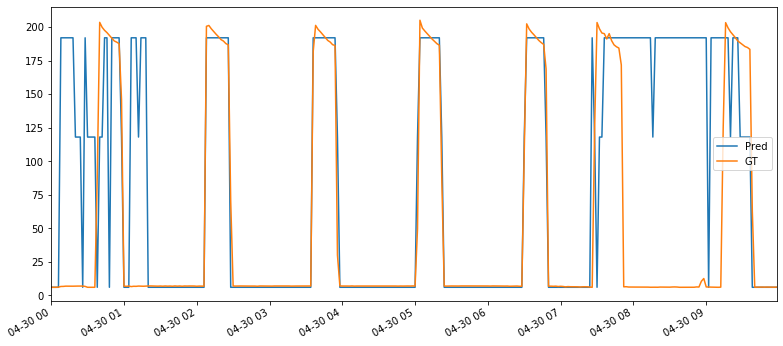

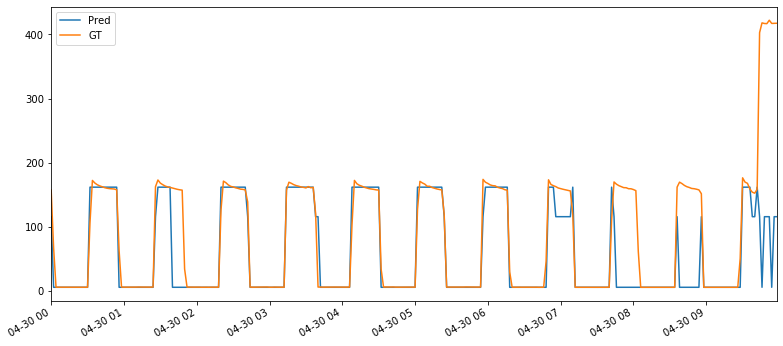

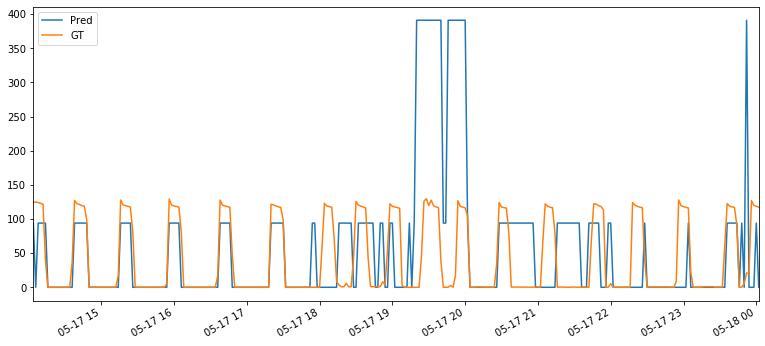

In [32]:
for i in range(3):
    plt.subplots(1)
    predictions[i]['Fridge'].head(300).plot(label="Pred")
    gts[i]['Fridge'].head(300).plot(label="GT")
    plt.legend()


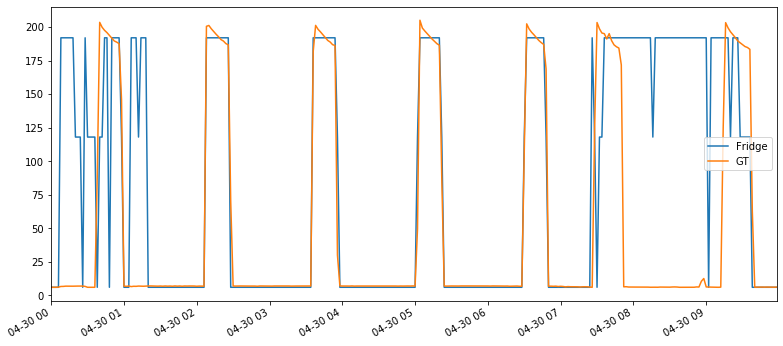

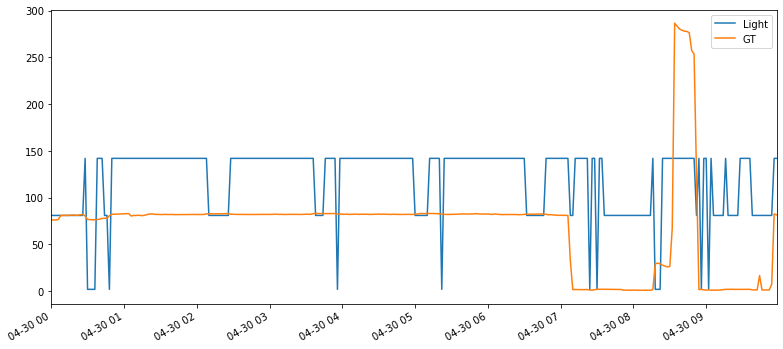

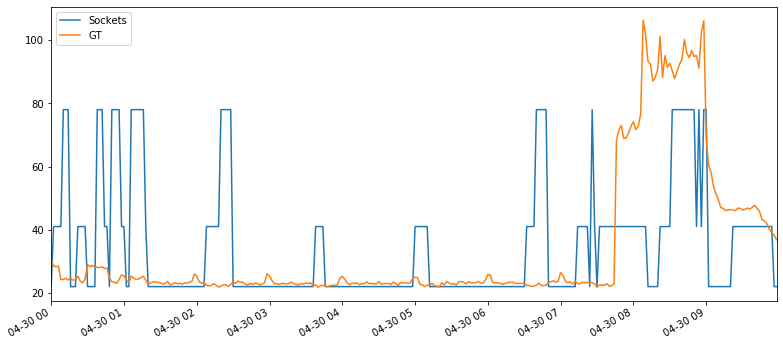

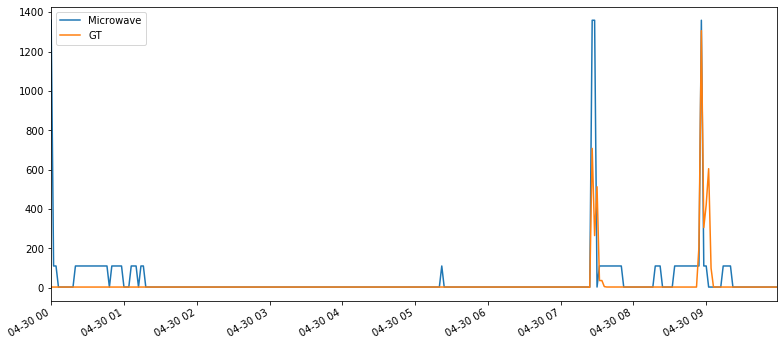

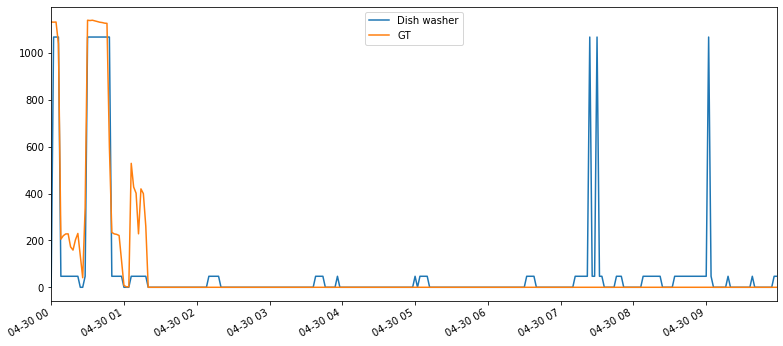

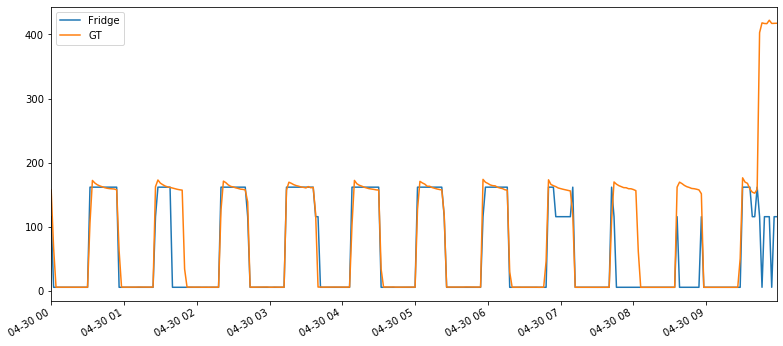

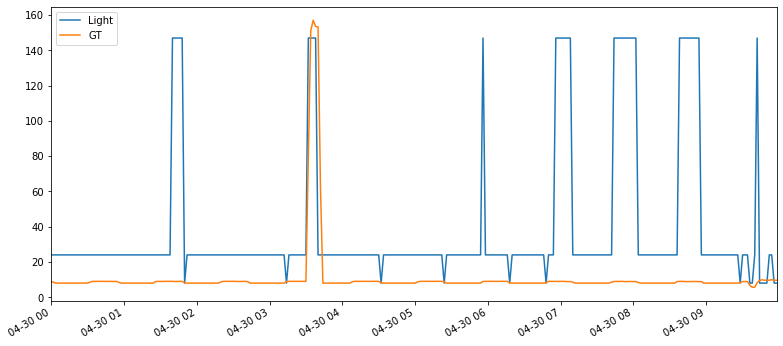

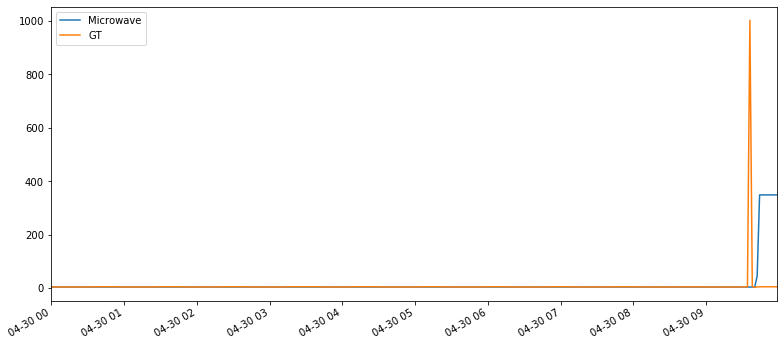

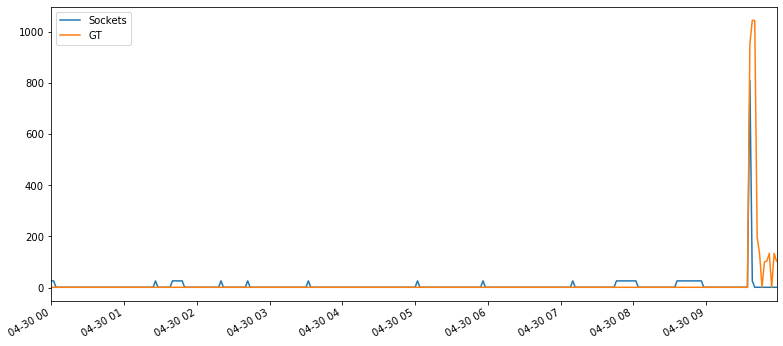

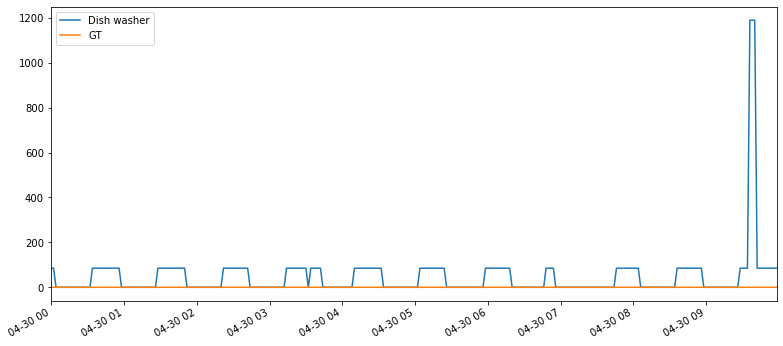

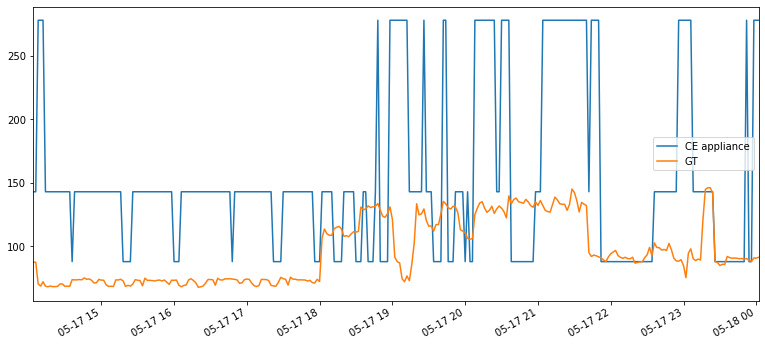

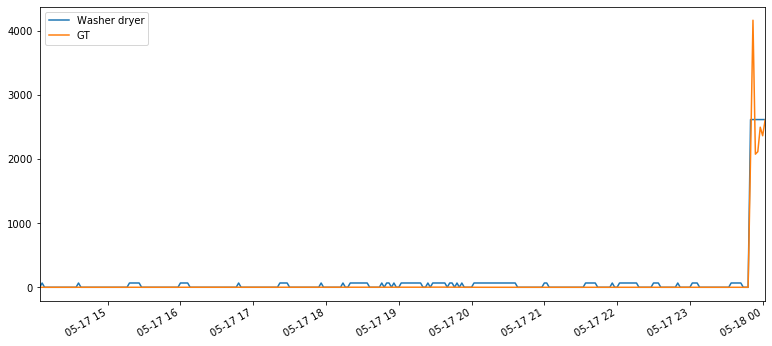

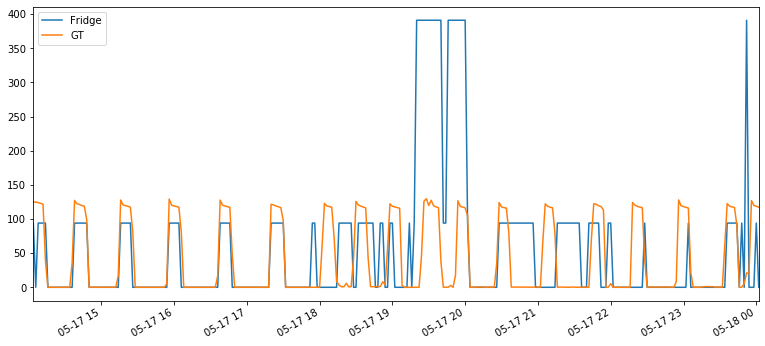

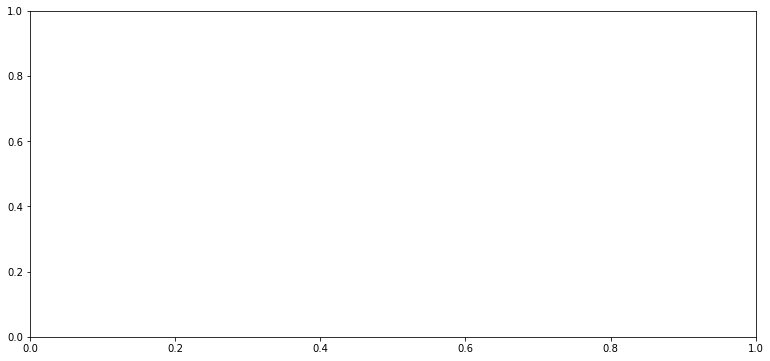

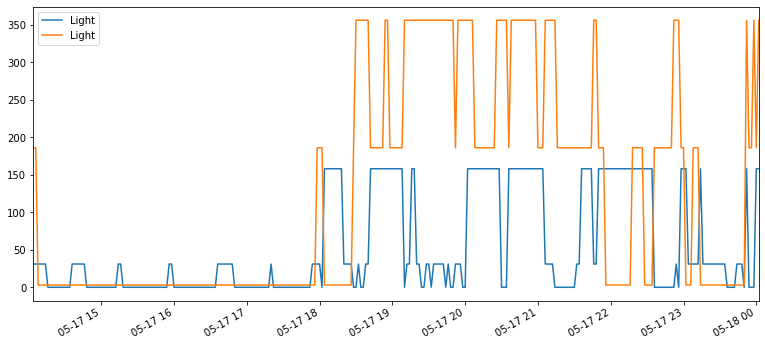

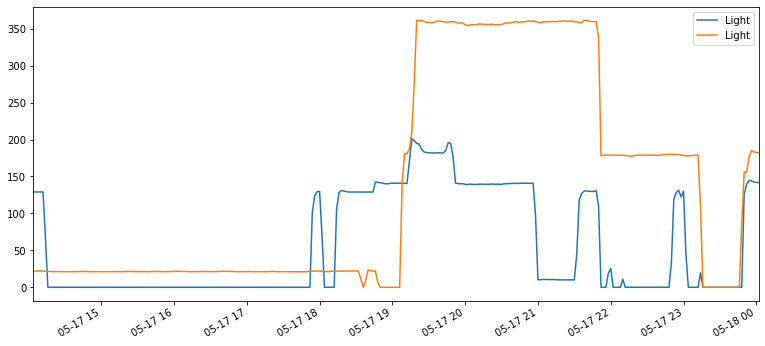

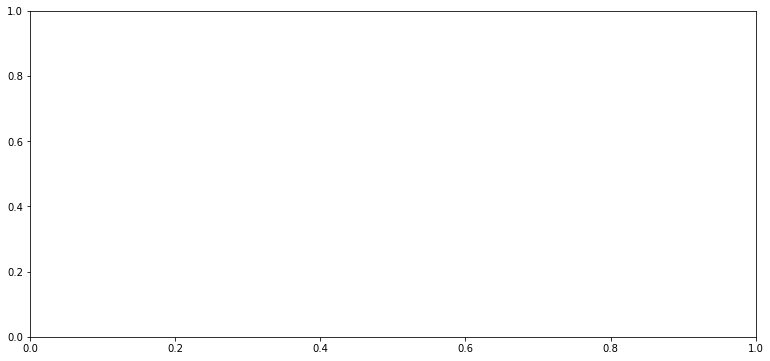

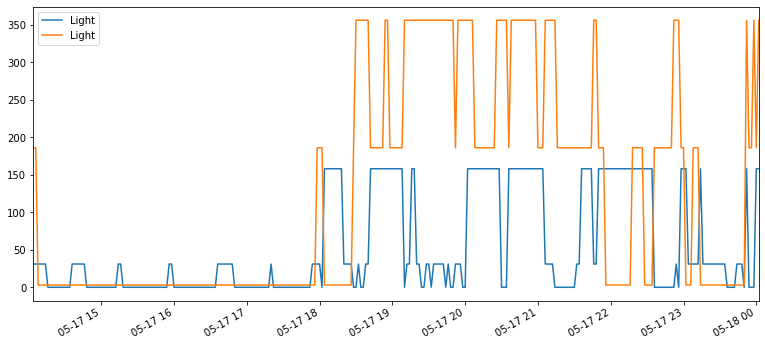

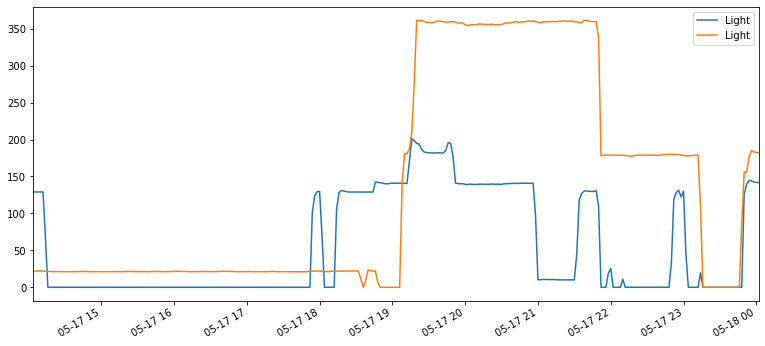

In [33]:
#Imprimindo todas as predições feitas para a casa 1 
for building in range(3):
    for appliance in predictions[building]:
        plt.subplots(1)
        predictions[building][appliance].head(300).plot(label=appliance)
        gts[building][appliance].head(300).plot(label="GT")
        plt.legend()

In [34]:
#testar as aplicações em 36 segundos
#Amostra retiradas da casa 


casa_1 = 0
sample_period = 72 #faz o down_sample para amostras a cada 36 segundos pq as as amostras são de 3 ou 4 segundos
predictions = []
gts = []
fhmm = FHMM()
fhmm.train(top_5_train_elec[casa_1], sample_period=sample_period)
gt, prediction = predict(fhmm, test_elec[casa_1], sample_period, train.metadata['timezone'])
    

Training model for submeter 'ElecMeter(instance=5, building=1, dataset='REDD', appliances=[Appliance(type='fridge', instance=1)])' with 3 states
Training model for submeter 'ElecMeter(instance=9, building=1, dataset='REDD', appliances=[Appliance(type='light', instance=1)])' with 3 states
Training model for submeter 'ElecMeter(instance=8, building=1, dataset='REDD', appliances=[Appliance(type='sockets', instance=2)])' with 3 states
Training model for submeter 'ElecMeter(instance=11, building=1, dataset='REDD', appliances=[Appliance(type='microwave', instance=1)])' with 3 states
Training model for submeter 'ElecMeter(instance=6, building=1, dataset='REDD', appliances=[Appliance(type='dish washer', instance=1)])' with 3 states
Loading data for meter ElecMeterID(instance=2, building=1, dataset='REDD')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=4, building=1, dataset='REDD')     
Done loading data all meters for this chunk.
Loading data for

In [35]:
def imprime_casa():
    appliance_labels = [m.label() for m in gt.columns.values]
    gt.columns = appliance_labels
    prediction.columns = appliance_labels

    #Imprime as medições
    for appliance in prediction:
            plt.subplots(1)
            prediction[appliance].head(300).plot(label=appliance)
            gt[appliance].head(300).plot(label="GT")
            plt.legend()

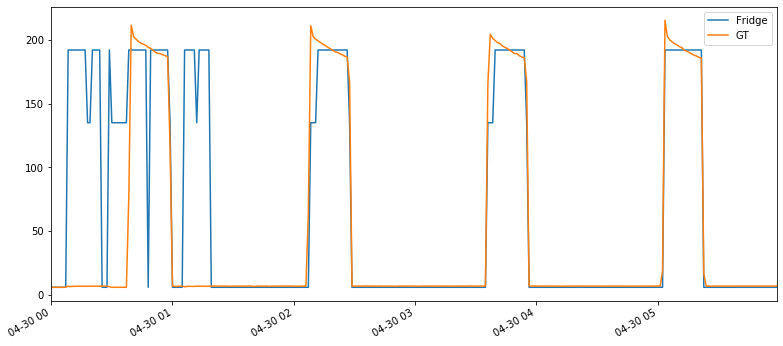

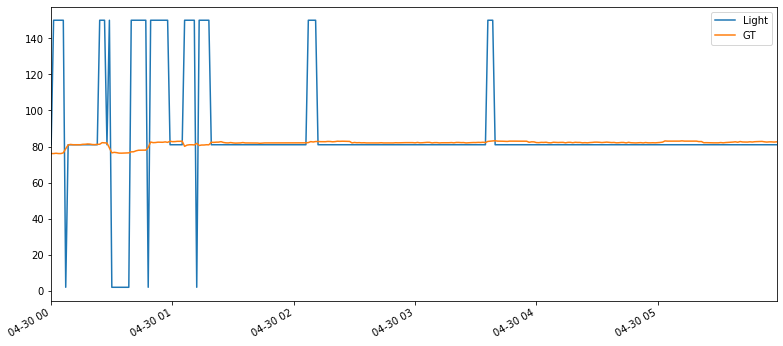

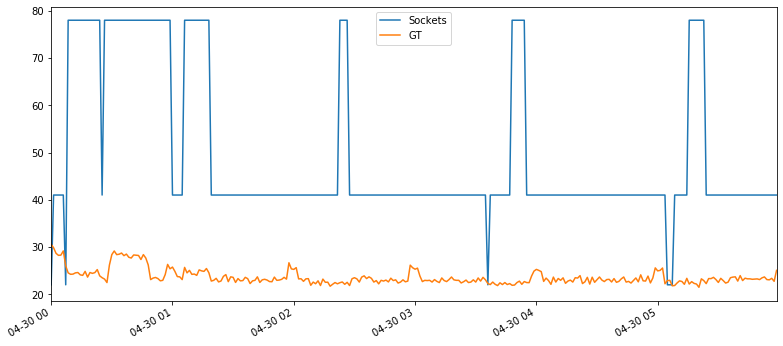

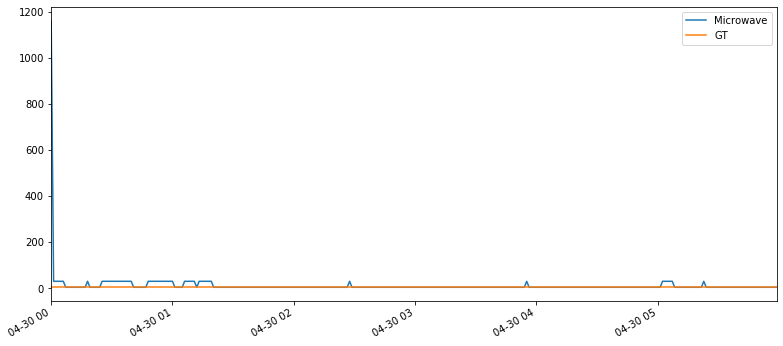

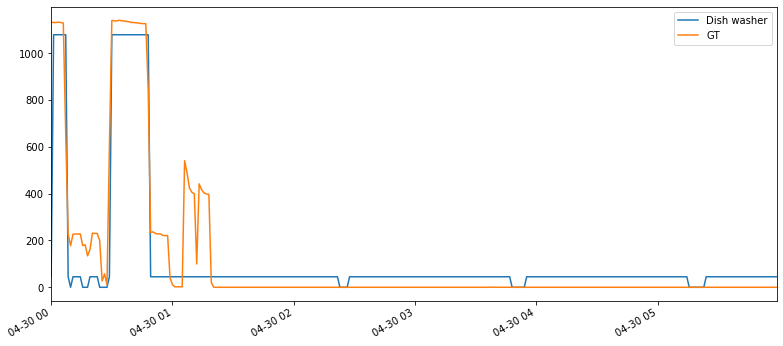

In [36]:
imprime_casa()

In [37]:
#testar as aplicações em 24 segundos para todos os algoritmos no NILMTK
#Amostra retiradas da casa 


casa_1 = 0
sample_period = 48 #faz o down_sample para amostras a cada 24 segundos pq as as amostras são de 3 ou 4 segundos
predictions = []
gts = []
fhmm = FHMM()
fhmm.train(top_5_train_elec[casa_1], sample_period=sample_period)
gt, prediction = predict(fhmm, test_elec[casa_1], sample_period, train.metadata['timezone'])
    

Training model for submeter 'ElecMeter(instance=5, building=1, dataset='REDD', appliances=[Appliance(type='fridge', instance=1)])' with 3 states
Training model for submeter 'ElecMeter(instance=9, building=1, dataset='REDD', appliances=[Appliance(type='light', instance=1)])' with 3 states
Training model for submeter 'ElecMeter(instance=8, building=1, dataset='REDD', appliances=[Appliance(type='sockets', instance=2)])' with 3 states
Training model for submeter 'ElecMeter(instance=11, building=1, dataset='REDD', appliances=[Appliance(type='microwave', instance=1)])' with 3 states
Training model for submeter 'ElecMeter(instance=6, building=1, dataset='REDD', appliances=[Appliance(type='dish washer', instance=1)])' with 3 states
Loading data for meter ElecMeterID(instance=2, building=1, dataset='REDD')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=4, building=1, dataset='REDD')     
Done loading data all meters for this chunk.
Loading data for

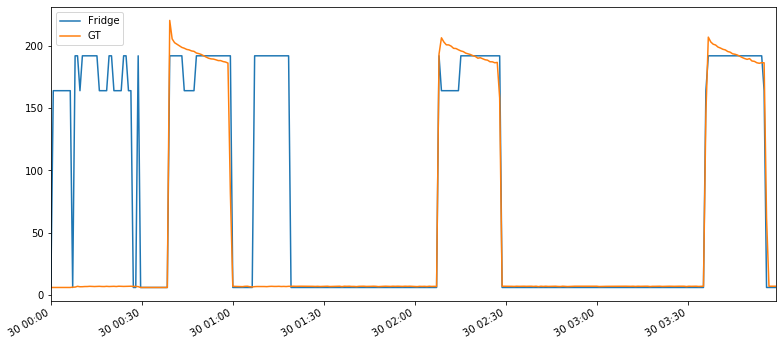

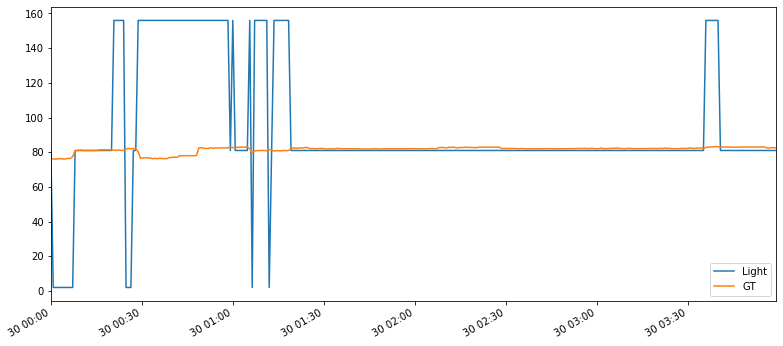

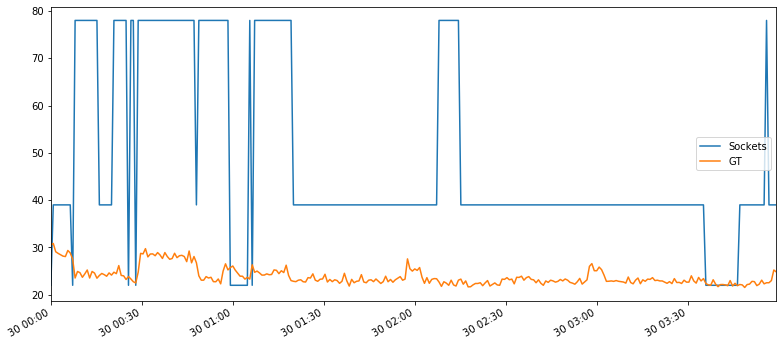

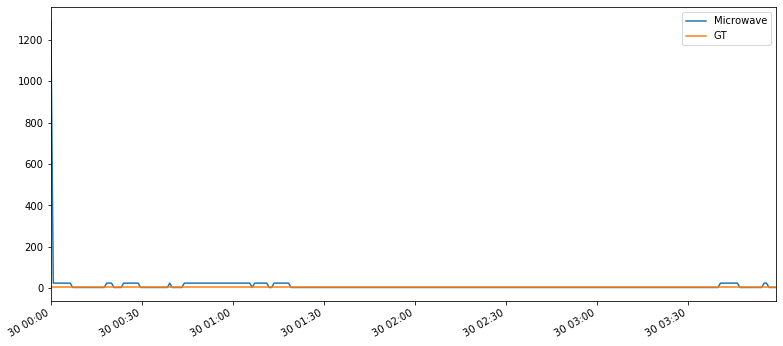

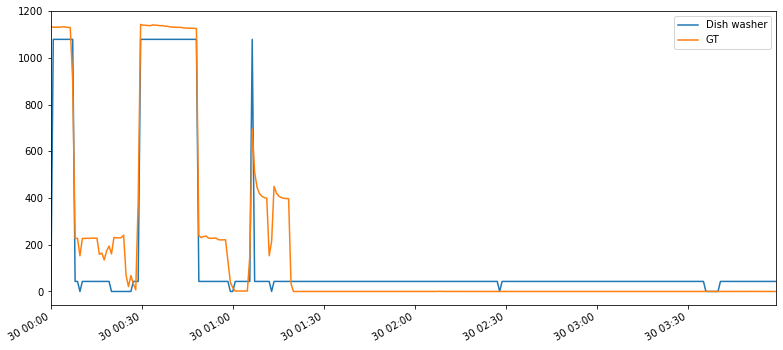

In [38]:
imprime_casa()
        

In [39]:
#CombinatorialOptimisation
sample_period = 48 #faz o down_sample para amostras a cada 24 segundos pq as as amostras são de 3 ou 4 segundos
predictions = []
gts = []
co = CombinatorialOptimisation()
co.train(top_5_train_elec[casa_1], sample_period=sample_period)
gt, prediction = predict(co, test_elec[casa_1], sample_period, train.metadata['timezone'])

Training model for submeter 'ElecMeter(instance=5, building=1, dataset='REDD', appliances=[Appliance(type='fridge', instance=1)])'
Training model for submeter 'ElecMeter(instance=9, building=1, dataset='REDD', appliances=[Appliance(type='light', instance=1)])'
Training model for submeter 'ElecMeter(instance=8, building=1, dataset='REDD', appliances=[Appliance(type='sockets', instance=2)])'
Training model for submeter 'ElecMeter(instance=11, building=1, dataset='REDD', appliances=[Appliance(type='microwave', instance=1)])'
Training model for submeter 'ElecMeter(instance=6, building=1, dataset='REDD', appliances=[Appliance(type='dish washer', instance=1)])'
Done training!
Loading data for meter ElecMeterID(instance=2, building=1, dataset='REDD')     
Done loading data all meters for this chunk.
Estimating power demand for 'ElecMeter(instance=5, building=1, dataset='REDD', appliances=[Appliance(type='fridge', instance=1)])'
Estimating power demand for 'ElecMeter(instance=9, building=1, da

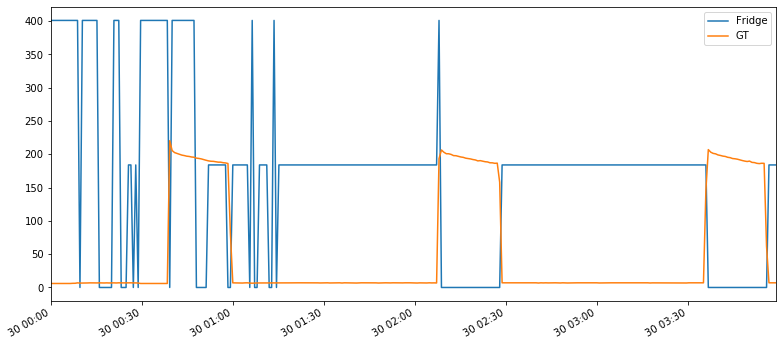

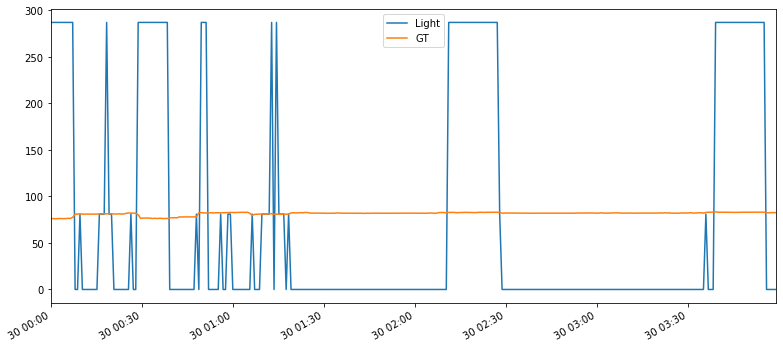

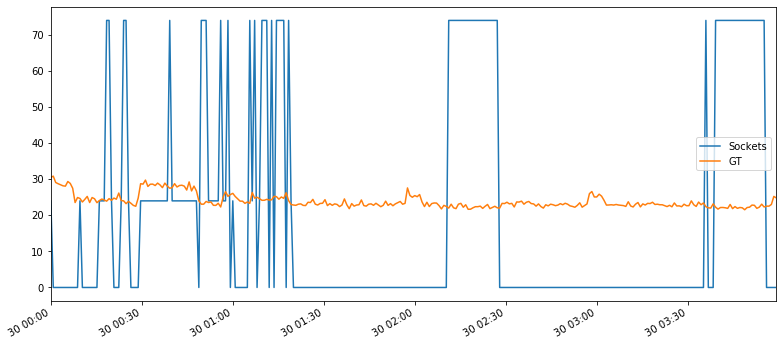

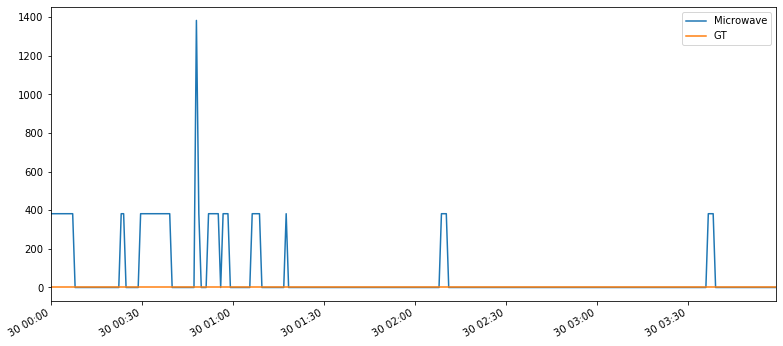

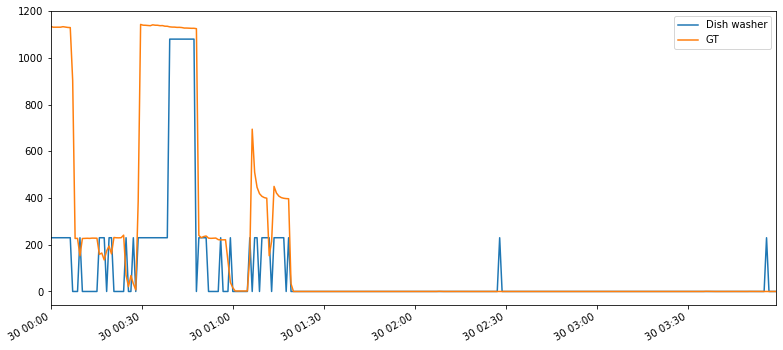

In [40]:
imprime_casa()

15/16 MeterGroup(meters==19, building=1, dataset='REDD', appliances=[Appliance(type='unknown', instance=2)])e=1)])ce=1)])
  ElecMeter(instance=3, building=1, dataset='REDD', appliances=[Appliance(type='electric oven', instance=1)])
  ElecMeter(instance=4, building=1, dataset='REDD', appliances=[Appliance(type='electric oven', instance=1)])
16/16 MeterGroup(meters= for ElecMeterID(instance=4, building=1, dataset='REDD') ...   
  ElecMeter(instance=10, building=1, dataset='REDD', appliances=[Appliance(type='washer dryer', instance=1)])
  ElecMeter(instance=20, building=1, dataset='REDD', appliances=[Appliance(type='washer dryer', instance=1)])
Calculating total_energy for ElecMeterID(instance=20, building=1, dataset='REDD') ...   Training model for submeter 'ElecMeter(instance=6, building=1, dataset='REDD', appliances=[Appliance(type='dish washer', instance=1)])' with 3 states
Training model for submeter 'ElecMeter(instance=5, building=1, dataset='REDD', appliances=[Appliance(type='fridg

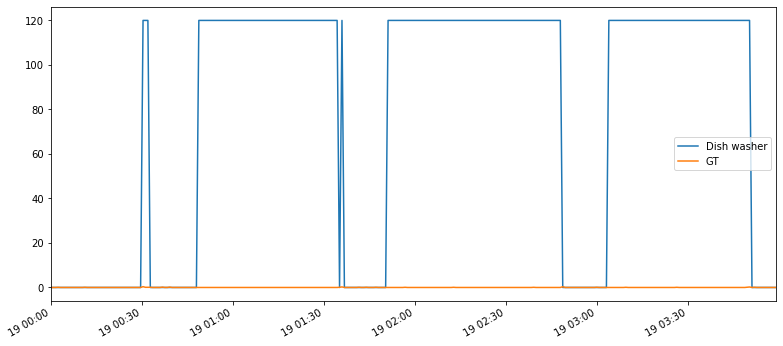

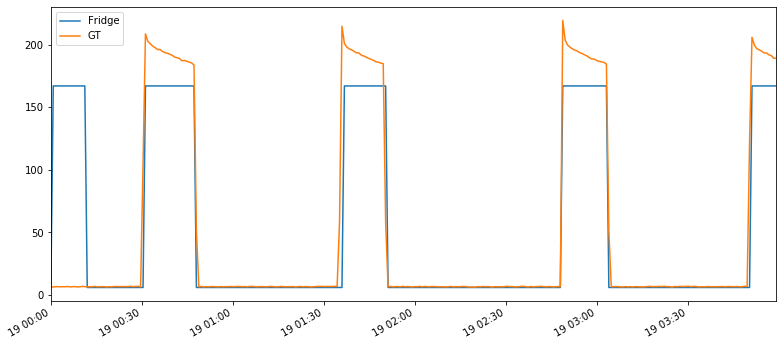

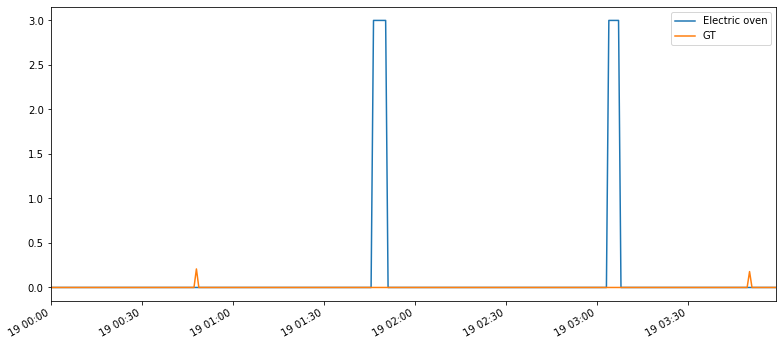

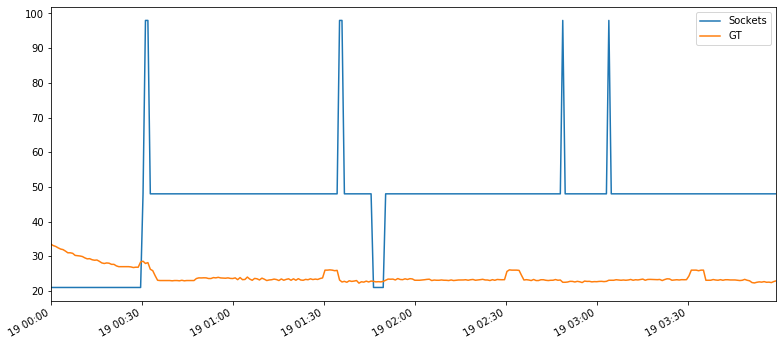

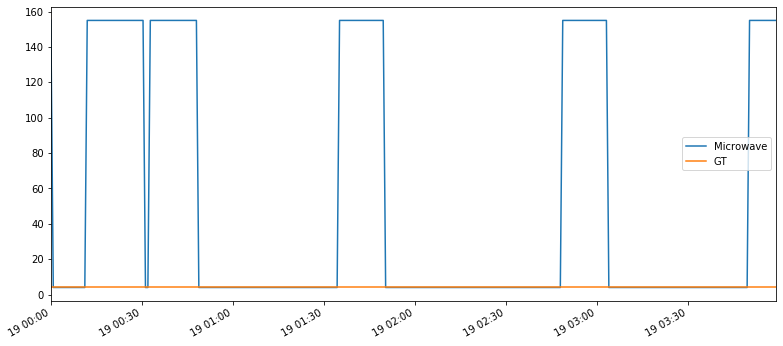

In [41]:
#Treinar com poucos dias
train.set_window(end="2011-04-19")
test.set_window(start="2011-04-19")

train_casa_1 = train.buildings[1].elec
test_casa_1 = test.buildings[1].elec

top_5_casa_1 = train_casa_1.submeters().select_top_k(k=5)

sample_period = 48 
predictions = []
gts = []
fhmm = FHMM()

fhmm.train(top_5_casa_1, sample_period=sample_period)
gt, prediction = predict(fhmm, test_casa_1, sample_period, train.metadata['timezone'])

imprime_casa()


15/16 MeterGroup(meters==19, building=1, dataset='REDD', appliances=[Appliance(type='unknown', instance=2)])e=1)])ce=1)])
  ElecMeter(instance=3, building=1, dataset='REDD', appliances=[Appliance(type='electric oven', instance=1)])
  ElecMeter(instance=4, building=1, dataset='REDD', appliances=[Appliance(type='electric oven', instance=1)])
16/16 MeterGroup(meters= for ElecMeterID(instance=4, building=1, dataset='REDD') ...   
  ElecMeter(instance=10, building=1, dataset='REDD', appliances=[Appliance(type='washer dryer', instance=1)])
  ElecMeter(instance=20, building=1, dataset='REDD', appliances=[Appliance(type='washer dryer', instance=1)])
Calculating total_energy for ElecMeterID(instance=20, building=1, dataset='REDD') ...   Training model for submeter 'ElecMeter(instance=5, building=1, dataset='REDD', appliances=[Appliance(type='fridge', instance=1)])' with 3 states
Training model for submeter 'ElecMeter(instance=9, building=1, dataset='REDD', appliances=[Appliance(type='light', in

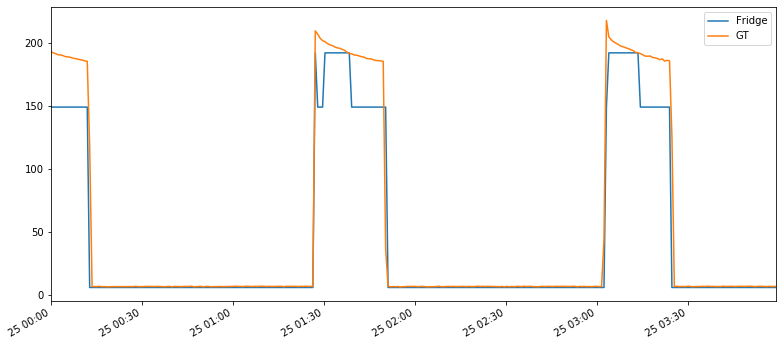

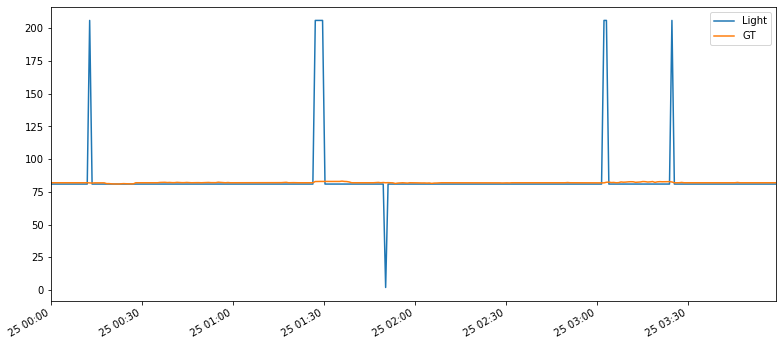

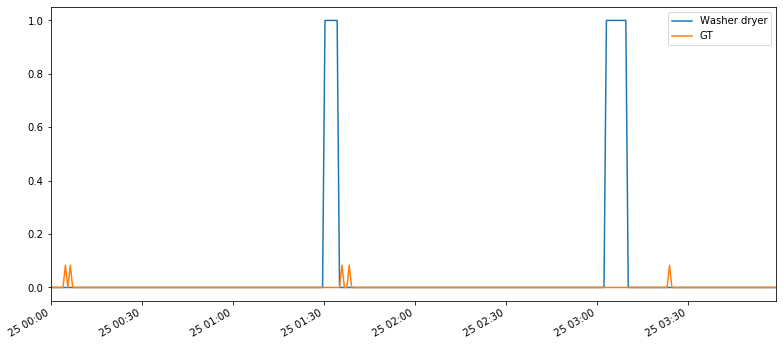

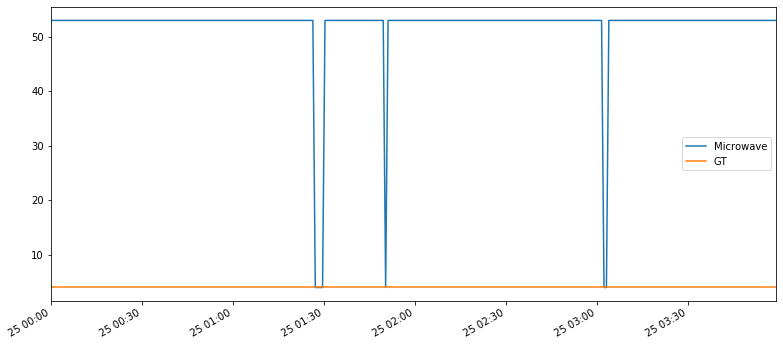

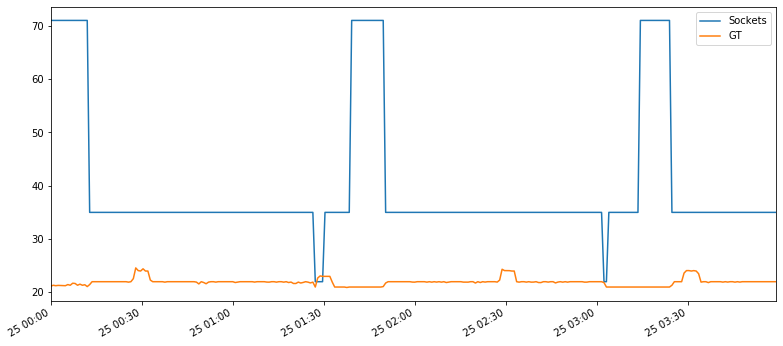

In [42]:
#Treinar com poucos dias
#Tentar usar a biblioteca tensorflow
# The dates are interpreted by Pandas, prefer using ISO dates (yyyy-mm-dd)
train.set_window(end="2011-04-25")
test.set_window(start="2011-04-25")

train_casa_1 = train.buildings[1].elec
test_casa_1 = test.buildings[1].elec

top_5_casa_1 = train_casa_1.submeters().select_top_k(k=5)

sample_period = 48 
predictions = []
gts = []
fhmm = FHMM()

fhmm.train(top_5_casa_1, sample_period=sample_period)
gt, prediction = predict(fhmm, test_casa_1, sample_period, train.metadata['timezone'])

imprime_casa()


15/16 MeterGroup(meters==19, building=1, dataset='REDD', appliances=[Appliance(type='unknown', instance=2)])e=1)])ce=1)])
  ElecMeter(instance=3, building=1, dataset='REDD', appliances=[Appliance(type='electric oven', instance=1)])
  ElecMeter(instance=4, building=1, dataset='REDD', appliances=[Appliance(type='electric oven', instance=1)])
16/16 MeterGroup(meters= for ElecMeterID(instance=4, building=1, dataset='REDD') ...   
  ElecMeter(instance=10, building=1, dataset='REDD', appliances=[Appliance(type='washer dryer', instance=1)])
  ElecMeter(instance=20, building=1, dataset='REDD', appliances=[Appliance(type='washer dryer', instance=1)])
Calculating total_energy for ElecMeterID(instance=20, building=1, dataset='REDD') ...   Training model for submeter 'ElecMeter(instance=5, building=1, dataset='REDD', appliances=[Appliance(type='fridge', instance=1)])' with 3 states
Training model for submeter 'ElecMeter(instance=9, building=1, dataset='REDD', appliances=[Appliance(type='light', in

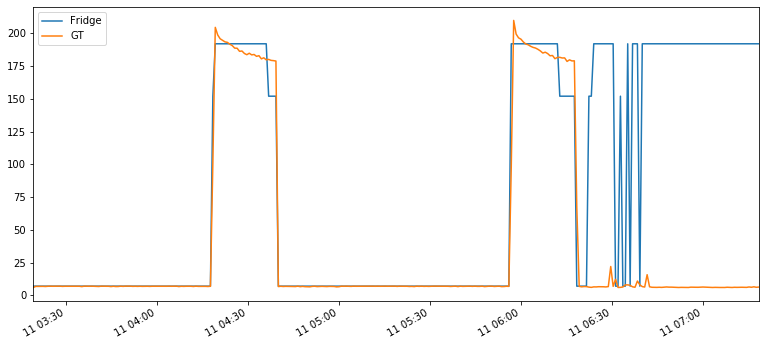

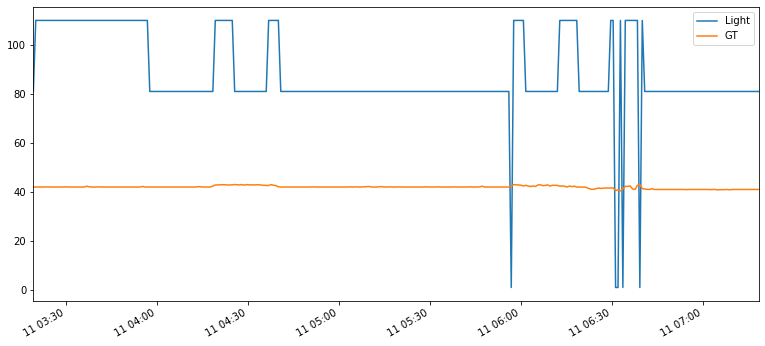

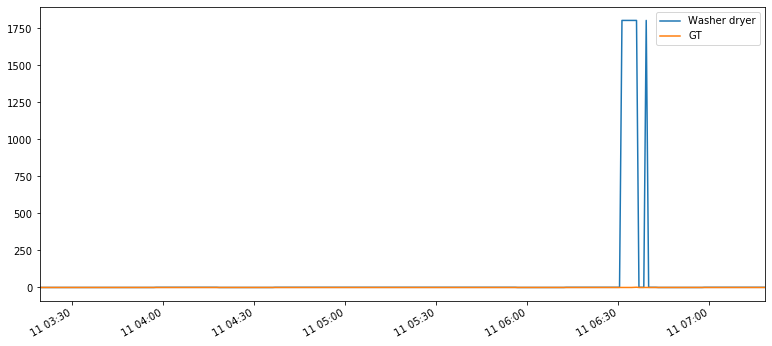

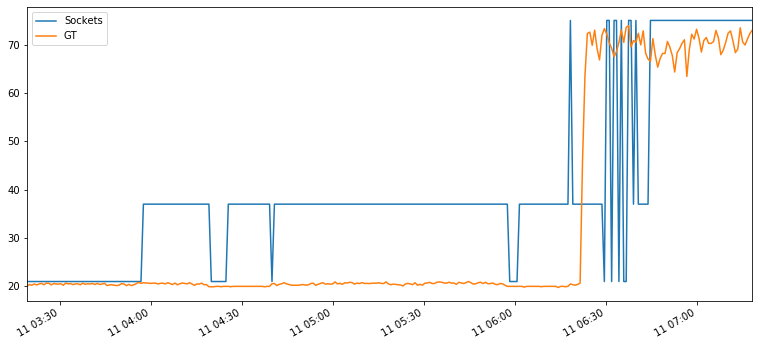

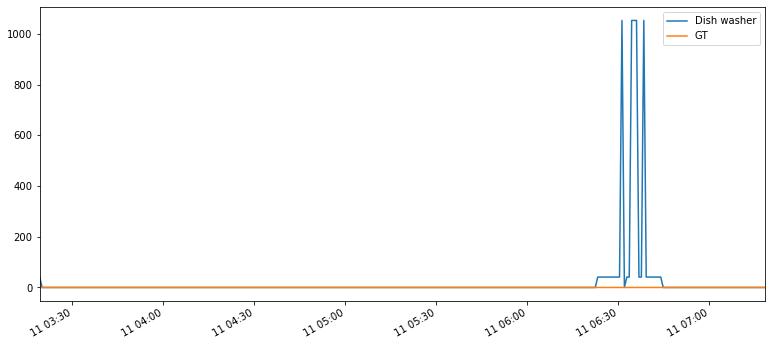

In [43]:
#Treinar com poucos dias
#Tentar usar a biblioteca tensorflow
train.set_window(end="2011-05-10")
test.set_window(start="2011-05-10")

train_casa_1 = train.buildings[1].elec
test_casa_1 = test.buildings[1].elec

top_5_casa_1 = train_casa_1.submeters().select_top_k(k=5)

sample_period = 48 
predictions = []
gts = []
fhmm = FHMM()

fhmm.train(top_5_casa_1, sample_period=sample_period)
gt, prediction = predict(fhmm, test_casa_1, sample_period, train.metadata['timezone'])

imprime_casa()

In [78]:
#Definição de uma função que é capaz de encontrar o valor da energia predita em cada caso
prediction

,Fridge,Light,Washer dryer,Sockets,Dish washer
2011-05-11 03:19:12-04:00,7.0,81.0,0.0,21.0,41.0
2011-05-11 03:20:00-04:00,7.0,110.0,0.0,21.0,0.0
2011-05-11 03:20:48-04:00,7.0,110.0,0.0,21.0,0.0
2011-05-11 03:21:36-04:00,7.0,110.0,0.0,21.0,0.0
2011-05-11 03:22:24-04:00,7.0,110.0,0.0,21.0,0.0
...,...,...,...,...,...
2011-05-24 15:52:48-04:00,192.0,1.0,1.0,37.0,41.0
2011-05-24 15:53:36-04:00,192.0,1.0,1.0,37.0,41.0
2011-05-24 15:54:24-04:00,192.0,1.0,1.0,37.0,41.0
2011-05-24 15:55:12-04:00,192.0,1.0,1.0,37.0,41.0


In [89]:
top_5_casa_1.energy_per_meter()

3/5 MeterGroup(meters==9, building=1, dataset='REDD', appliances=[Appliance(type='light', instance=1)]))
  ElecMeter(instance=10, building=1, dataset='REDD', appliances=[Appliance(type='washer dryer', instance=1)])
  ElecMeter(instance=20, building=1, dataset='REDD', appliances=[Appliance(type='washer dryer', instance=1)])
5/5 ElecMeter(instance=6, building=1, dataset='REDD', appliances=[Appliance(type='dish washer', instance=1)])cMeterID(instance=20, building=1, dataset='REDD') ...   

,"(5, 1, REDD)","(9, 1, REDD)","(((10, 1, REDD), (20, 1, REDD)),)","(8, 1, REDD)","(6, 1, REDD)"
active,24.856372,19.941878,17.14525,13.289363,11.093705
apparent,NaN,NaN,NaN,NaN,NaN
reactive,NaN,NaN,NaN,NaN,NaN


In [86]:
from nilmtk.stats.totalenergy import _energy_for_power_series
objetos = ['Fridge', 'Light', 'Washer dryer', 'Sockets', 'Dish washer']
energias = {}

for objeto in objetos:
    aux = _energy_for_power_series(prediction.loc[:, objeto], 60)
    energias[objeto] = aux

energias

{'Fridge': 52.22656,
 'Light': 25.319546666666668,
 'Washer dryer': 5.669653333333334,
 'Sockets': 8.403973333333333,
 'Dish washer': 17.76272}